### 数据预处理

In [1]:
import csv
import pandas as pd
import numpy as np
import json

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,high0,high1,high2,high3,high4,high5,high6,high7,high8,high9,...,low694,low695,low696,low697,low698,low699,y1,y2,y3,y4
0,0.359752,0.424275,-0.681706,0.433839,0.004776,0.001909,0.004776,0.001909,97.547158,48.476906,...,147867.681361,34273.003529,147552.433395,33959.200637,39.083400,10.692026,2,1,0,6
1,0.374953,0.477638,-0.666732,0.429372,0.010201,0.002640,0.010201,0.002640,94.752225,45.264284,...,0.000000,0.000000,0.000000,0.000000,9.121715,3.024193,2,1,0,6
2,0.374791,0.433773,-0.650851,0.302914,0.027013,0.007587,0.027013,0.007587,103.646422,66.342239,...,309465.762848,70251.212387,86736.061773,19023.865616,272.618048,39.410815,0,1,0,4
3,0.425997,0.407457,-0.651442,0.335262,0.018433,0.004401,0.018433,0.004401,107.650662,116.364404,...,34427.765392,8119.821369,0.000000,0.000000,243362.224842,54139.263203,2,1,0,4
4,0.462599,0.428727,-0.676588,0.425349,0.004667,0.002822,0.004667,0.002822,104.963457,19.671929,...,516165.111104,112837.709221,355822.121392,80991.490121,142600.840444,31689.816294,0,1,0,4


选择 High-level features

In [6]:
X = data.drop(['y1','y2','y3','y4'],axis=1)
X = X.iloc[:,:746]
y1 = data['y1']
y2 = data['y2']
y3 = data['y3']
y4 = data['y4']
y = data[['y1','y2','y3','y4']]

In [7]:
X.head()

,high0,high1,high2,high3,high4,high5,high6,high7,high8,high9,...,high736,high737,high738,high739,high740,high741,high742,high743,high744,high745
0,0.359752,0.424275,-0.681706,0.433839,0.004776,0.001909,0.004776,0.001909,97.547158,48.476906,...,272112.252243,76047.684898,169839.362072,46701.487476,147867.681361,34273.003529,147552.433395,33959.200637,39.083400,10.692026
1,0.374953,0.477638,-0.666732,0.429372,0.010201,0.002640,0.010201,0.002640,94.752225,45.264284,...,52893.963203,14728.068098,508166.296681,136867.615309,0.000000,0.000000,0.000000,0.000000,9.121715,3.024193
2,0.374791,0.433773,-0.650851,0.302914,0.027013,0.007587,0.027013,0.007587,103.646422,66.342239,...,297675.765155,78163.056222,373672.168560,94835.329620,309465.762848,70251.212387,86736.061773,19023.865616,272.618048,39.410815
3,0.425997,0.407457,-0.651442,0.335262,0.018433,0.004401,0.018433,0.004401,107.650662,116.364404,...,150644.829017,40168.147290,396776.193606,104552.824689,34427.765392,8119.821369,0.000000,0.000000,243362.224842,54139.263203
4,0.462599,0.428727,-0.676588,0.425349,0.004667,0.002822,0.004667,0.002822,104.963457,19.671929,...,368334.318820,96758.790944,230614.666407,61553.069717,516165.111104,112837.709221,355822.121392,80991.490121,142600.840444,31689.816294


检查 nan

In [8]:
idx = np.where(np.isnan(X).any(axis=1)==True)[0]
idx

array([1564])

In [9]:
if len(idx) != 0:
    print(f"drop {len(idx)} rows with nan value")
    for i in idx:
        X = np.delete(X, i, axis=0)
        y1 = np.delete(y1, i, axis=0)
        y2 = np.delete(y2, i, axis=0)
        y3 = np.delete(y3, i, axis=0)
        y4 = np.delete(y4, i, axis=0)
        y = np.delete(y, i, axis=0)

drop 1 rows with nan value


In [10]:
X_norm = np.apply_along_axis(lambda x: x / np.linalg.norm(x), axis=0, arr=X)


In [11]:
# check nan in X_norm
np.where(np.isnan(X_norm).any(axis=1)==True)

(array([], dtype=int64),)

In [12]:
print(f"Read in videos y:{len(y1)}")

Read in videos y:3655


维度

In [13]:
print(f"X:{len(X[0])}")

X:746


## Train 

In [14]:
from sklearn.model_selection import train_test_split
# frame split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)
print(f"Video num: X_train:{len(X_train)}, X_test:{len(X_test)}, y_train:{len(y_train)}, y_test:{len(y_test)}")

y1_train, y1_test = y_train[:,0], y_test[:,0]
y2_train, y2_test = y_train[:,1], y_test[:,1]
y3_train, y3_test = y_train[:,2], y_test[:,2]
y4_train, y4_test = y_train[:,3], y_test[:,3]

Video num: X_train:2924, X_test:731, y_train:2924, y_test:731


In [15]:
target = [["强","中","弱","没有回应（忽视）"], 
        ['中性','积极','消极'], 
        ["专注（任务中）","走神（任务外）"], 
        ["玩乐", "闲聊", "一人独立尝试一人摸鱼", "各自神游", "主导", "支持", "旁观", "冲突"]]

查看数据分布

强:873, 中:524, 弱:1506, 没有回应（忽视）:752, 


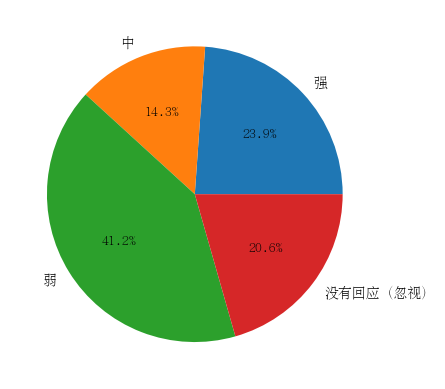

中性:2068, 积极:1076, 消极:511, 


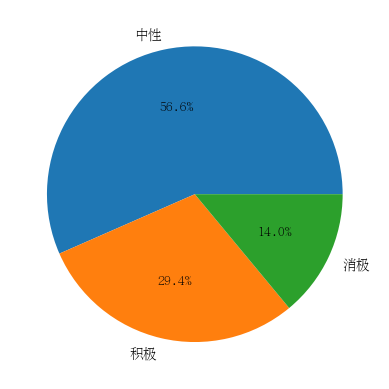

专注（任务中）:3216, 走神（任务外）:439, 


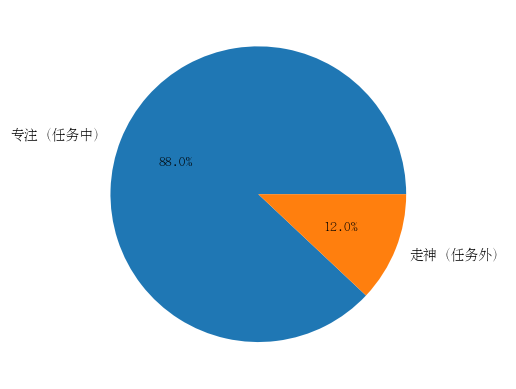

玩乐:13, 闲聊:39, 一人独立尝试一人摸鱼:371, 各自神游:20, 主导:1022, 支持:1045, 旁观:1121, 冲突:24, 


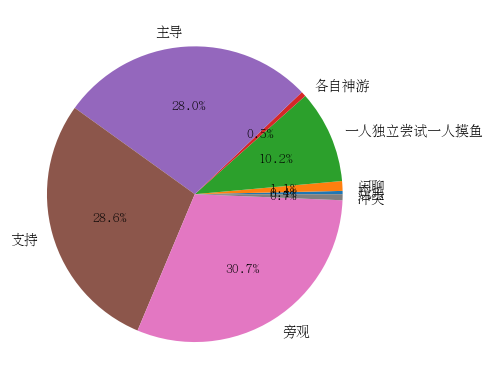

In [16]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties  # 步骤一

plt.rcParams["font.sans-serif"]=["AR PL UMing CN"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

def num_of_cls(y, target): 
    N = []
    for i in range(len(target)):
        print(target[i] + f":{len(y[y==i])}", end=", ")
        N.append(len(y[y==i]))
    print()
    return N

for i in range(4):
    N = num_of_cls(y[:,i],target[i])
    # proportions = [ p/len(y) for p in N]
    plt.pie(N,labels=target[i],autopct='%1.1f%%')
    plt.show()


Cross-validation  
- 5 folds

In [17]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score, recall_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV

def crossVal(rfc, X, y):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    scoring = ['accuracy', 'f1_weighted', 'recall_weighted', 'precision_weighted']

    # 使用交叉验证器对模型进行评估
    scores = cross_validate(rfc, X, y, cv=kfold, scoring=scoring)

    # 输出交叉验证结果
    print('Accuracy:', scores['test_accuracy'].mean())
    print('F1 score:', scores['test_f1_weighted'].mean())
    print('Recall:', scores['test_recall_weighted'].mean())
    print('Precision:', scores['test_precision_weighted'].mean())

def GridSearch(estimator, param_grid, X_train, y_train, X_test, y_test, target, cv=5):
    # grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv)
    # grid_search = RandomizedSearchCV(estimator=estimator, param_grid=param_grid, cv=cv)
    # grid_search = HalvingGridSearchCV(estimator=estimator, param_distributions=param_grid, cv=cv)
    grid_search = HalvingRandomSearchCV(estimator=estimator,param_distributions=param_grid, cv=cv)


    grid_search.fit(X_train, y_train)

    # print(grid_search.best_params_, grid_search.best_score_)
    print("Best hyperparameters:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)
    
    best_model = grid_search.best_estimator_
    test_score = best_model.score(X_test, y_test)
    y_predict = best_model.predict(X_test)
    print("Test score:", test_score)
    print("Report:")
    print(classification_report(y_test, y_predict, target_names=target, zero_division=0))
    return best_model

### Random Forest

In [18]:

from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# 使用随机森林预测一个frame
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)
rfc.fit(X_train, y_train)
y_predict = rfc.predict(X_test)

for i in range(len(target)):
    print(f"----------------------Task {i}----------------------")
    print(classification_report(y_test[:,i], y_predict[:,i], target_names=target[i],zero_division=0))
    num_of_cls(y_predict[:,i],target[i])


----------------------Task 0----------------------
              precision    recall  f1-score   support

           强       0.55      0.26      0.36       183
           中       0.00      0.00      0.00       103
           弱       0.46      0.87      0.60       309
    没有回应（忽视）       0.47      0.20      0.28       136

    accuracy                           0.47       731
   macro avg       0.37      0.33      0.31       731
weighted avg       0.42      0.47      0.39       731

强:87, 中:0, 弱:587, 没有回应（忽视）:57, 
----------------------Task 1----------------------
              precision    recall  f1-score   support

          中性       0.57      0.98      0.72       401
          积极       0.79      0.14      0.23       218
          消极       0.00      0.00      0.00       112

    accuracy                           0.58       731
   macro avg       0.45      0.37      0.32       731
weighted avg       0.55      0.58      0.47       731

中性:693, 积极:38, 消极:0, 
----------------------Task 2

#### task 1

In [19]:
# GridSearch
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rfc = RandomForestClassifier()
RandomForest = GridSearch(estimator=rfc, 
                            param_grid=param_grid, 
                            X_train=X_train, y_train=y1_train, 
                            X_test=X_test, y_test=y1_test,
                            target=target[0], cv=5)

Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best cross-validation score: 0.43376830318690784
Test score: 0.4883720930232558
Report:
              precision    recall  f1-score   support

           强       0.54      0.32      0.40       183
           中       0.00      0.00      0.00       103
           弱       0.48      0.84      0.61       309
    没有回应（忽视）       0.49      0.28      0.36       136

    accuracy                           0.49       731
   macro avg       0.38      0.36      0.34       731
weighted avg       0.43      0.49      0.42       731



#### Task 2

In [20]:
# GridSearch
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rfc = RandomForestClassifier()
RandomForest = GridSearch(estimator=rfc, param_grid=param_grid, 
                            X_train=X_train, y_train=y2_train, 
                            X_test=X_test, y_test=y2_test,
                            target=target[1], cv=5)

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 30}
Best cross-validation score: 0.6060107759535022
Test score: 0.5882352941176471
Report:
              precision    recall  f1-score   support

          中性       0.58      0.96      0.72       401
          积极       0.70      0.20      0.31       218
          消极       1.00      0.01      0.02       112

    accuracy                           0.59       731
   macro avg       0.76      0.39      0.35       731
weighted avg       0.68      0.59      0.49       731



#### Task 3

In [21]:
# GridSearch
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rfc = RandomForestClassifier()
RandomForest = GridSearch(estimator=rfc, param_grid=param_grid, 
                            X_train=X_train, y_train=y3_train, 
                            X_test=X_test, y_test=y3_test,
                            target=target[2], cv=5)

/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 144 is smaller than n_iter=146. Running 144 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}
Best cross-validation score: 0.883270267171196
Test score: 0.8741450068399452
Report:
              precision    recall  f1-score   support

     专注（任务中）       0.87      1.00      0.93       638
     走神（任务外）       1.00      0.01      0.02        93

    accuracy                           0.87       731
   macro avg       0.94      0.51      0.48       731
weighted avg       0.89      0.87      0.82       731



#### Task 4

In [22]:
# GridSearch
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rfc = RandomForestClassifier()
RandomForest = GridSearch(estimator=rfc, param_grid=param_grid, 
                            X_train=X_train, y_train=y4_train, 
                            X_test=X_test, y_test=y4_test,
                            target=target[3], cv=5)

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Best cross-validation score: 0.4432617942768755
Test score: 0.4692202462380301
Report:
              precision    recall  f1-score   support

          玩乐       0.00      0.00      0.00         3
          闲聊       0.00      0.00      0.00         7
  一人独立尝试一人摸鱼       0.56      0.13      0.21        78
        各自神游       0.00      0.00      0.00         5
          主导       0.47      0.51      0.49       205
          支持       0.48      0.50      0.49       207
          旁观       0.46      0.57      0.51       219
          冲突       0.00      0.00      0.00         7

    accuracy                           0.47       731
   macro avg       0.24      0.21      0.21       731
weighted avg       0.46      0.47      0.45       731



### DT

In [23]:
from sklearn.tree import DecisionTreeClassifier
# 建立决策树分类器
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
for i in range(len(target)):
    print(f"----------------------Task {i}----------------------")
    print(classification_report(y_test[:,i], y_predict[:,i], target_names=target[i],zero_division=0))
    num_of_cls(y_predict[:,i],target[i])

----------------------Task 0----------------------
              precision    recall  f1-score   support

           强       0.36      0.31      0.33       183
           中       0.15      0.16      0.15       103
           弱       0.45      0.42      0.44       309
    没有回应（忽视）       0.27      0.35      0.30       136

    accuracy                           0.34       731
   macro avg       0.31      0.31      0.30       731
weighted avg       0.35      0.34      0.35       731

强:156, 中:110, 弱:288, 没有回应（忽视）:177, 
----------------------Task 1----------------------
              precision    recall  f1-score   support

          中性       0.58      0.65      0.61       401
          积极       0.35      0.31      0.33       218
          消极       0.20      0.17      0.18       112

    accuracy                           0.47       731
   macro avg       0.38      0.37      0.37       731
weighted avg       0.46      0.47      0.46       731

中性:443, 积极:191, 消极:97, 
----------------------

#### task 1

In [24]:
# GridSearch
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120, 150],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
clf = DecisionTreeClassifier()
DT = GridSearch(estimator=clf, 
                param_grid=param_grid, 
                X_train=X_train, y_train=y1_train, 
                X_test=X_test, y_test=y1_test,
                target=target[0], cv=5)

Best hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'gini'}
Best cross-validation score: 0.3929672695951766
Test score: 0.426812585499316
Report:
              precision    recall  f1-score   support

           强       0.37      0.39      0.38       183
           中       0.00      0.00      0.00       103
           弱       0.48      0.69      0.57       309
    没有回应（忽视）       0.30      0.20      0.24       136

    accuracy                           0.43       731
   macro avg       0.29      0.32      0.30       731
weighted avg       0.35      0.43      0.38       731



#### task 2

In [25]:
clf = DecisionTreeClassifier()
DT = GridSearch(estimator=clf, 
                param_grid=param_grid, 
                X_train=X_train, y_train=y2_train, 
                X_test=X_test, y_test=y2_test,
                target=target[1], cv=5)

Best hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'criterion': 'entropy'}
Best cross-validation score: 0.5714225107123159
Test score: 0.5540355677154583
Report:
              precision    recall  f1-score   support

          中性       0.58      0.87      0.69       401
          积极       0.45      0.25      0.32       218
          消极       0.33      0.02      0.03       112

    accuracy                           0.55       731
   macro avg       0.45      0.38      0.35       731
weighted avg       0.50      0.55      0.48       731



#### task 3

In [26]:
clf = DecisionTreeClassifier()
DT = GridSearch(estimator=clf, 
                param_grid=param_grid, 
                X_train=X_train, y_train=y3_train, 
                X_test=X_test, y_test=y3_test,
                target=target[2], cv=5)

Best hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 7, 'criterion': 'gini'}
Best cross-validation score: 0.8554600007644384
Test score: 0.8604651162790697
Report:
              precision    recall  f1-score   support

     专注（任务中）       0.90      0.95      0.92       638
     走神（任务外）       0.42      0.26      0.32        93

    accuracy                           0.86       731
   macro avg       0.66      0.60      0.62       731
weighted avg       0.84      0.86      0.85       731



#### task 4

In [27]:
clf = DecisionTreeClassifier()
DT = GridSearch(estimator=clf, 
                param_grid=param_grid, 
                X_train=X_train, y_train=y4_train, 
                X_test=X_test, y_test=y4_test,
                target=target[3], cv=5)

Best hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 50, 'criterion': 'gini'}
Best cross-validation score: 0.3668320873077253
Test score: 0.33105335157318744
Report:
              precision    recall  f1-score   support

          玩乐       0.00      0.00      0.00         3
          闲聊       0.00      0.00      0.00         7
  一人独立尝试一人摸鱼       0.20      0.21      0.20        78
        各自神游       0.00      0.00      0.00         5
          主导       0.35      0.33      0.34       205
          支持       0.35      0.36      0.35       207
          旁观       0.38      0.38      0.38       219
          冲突       0.00      0.00      0.00         7

    accuracy                           0.33       731
   macro avg       0.16      0.16      0.16       731
weighted avg       0.33      0.33      0.33       731



### KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# 建立KNN分类器
clf = KNeighborsClassifier(n_neighbors=3)

#### task 1

In [30]:
# GridSearch
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'leaf_size': list(range(1, 51))
}
clf = KNeighborsClassifier()
KNN = GridSearch(estimator=clf, param_grid=param_grid, 
                            X_train=X_train, y_train=y1_train, 
                            X_test=X_test, y_test=y1_test,
                            target=target[0], cv=5)

Best hyperparameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 24, 'leaf_size': 3}
Best cross-validation score: 0.39945305770887163
Test score: 0.4363885088919289
Report:
              precision    recall  f1-score   support

           强       0.41      0.25      0.31       183
           中       0.33      0.03      0.05       103
           弱       0.44      0.82      0.57       309
    没有回应（忽视）       0.42      0.13      0.20       136

    accuracy                           0.44       731
   macro avg       0.40      0.31      0.29       731
weighted avg       0.42      0.44      0.37       731



#### task 2

In [31]:
# GridSearch
param_grid = {
    'n_neighbors': list(range(1, 29)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'leaf_size': list(range(1, 51))
}
clf = KNeighborsClassifier()
KNN = GridSearch(estimator=clf, param_grid=param_grid, 
                            X_train=X_train, y_train=y2_train, 
                            X_test=X_test, y_test=y2_test,
                            target=target[1], cv=6)

Best hyperparameters: {'weights': 'uniform', 'p': 2, 'n_neighbors': 25, 'leaf_size': 10}
Best cross-validation score: 0.5683466972126765
Test score: 0.5636114911080712
Report:
              precision    recall  f1-score   support

          中性       0.57      0.93      0.70       401
          积极       0.53      0.18      0.27       218
          消极       0.00      0.00      0.00       112

    accuracy                           0.56       731
   macro avg       0.36      0.37      0.33       731
weighted avg       0.47      0.56      0.47       731



#### task 3

In [32]:
param_grid = {
    'n_neighbors': list(range(1, 29)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'leaf_size': list(range(1, 51))
}
clf = KNeighborsClassifier()
KNN = GridSearch(estimator=clf, param_grid=param_grid, 
                            X_train=X_train, y_train=y3_train, 
                            X_test=X_test, y_test=y3_test,
                            target=target[2], cv=10)

Best hyperparameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 19, 'leaf_size': 33}
Best cross-validation score: 0.8798892350294218
Test score: 0.8727770177838577
Report:
              precision    recall  f1-score   support

     专注（任务中）       0.87      1.00      0.93       638
     走神（任务外）       0.00      0.00      0.00        93

    accuracy                           0.87       731
   macro avg       0.44      0.50      0.47       731
weighted avg       0.76      0.87      0.81       731



#### task 4

In [33]:
clf = KNeighborsClassifier()
KNN = GridSearch(estimator=clf, param_grid=param_grid, 
                            X_train=X_train, y_train=y4_train, 
                            X_test=X_test, y_test=y4_test,
                            target=target[3], cv=5)

Best hyperparameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 13, 'leaf_size': 35}
Best cross-validation score: 0.36729934691071586
Test score: 0.3912448700410397
Report:
              precision    recall  f1-score   support

          玩乐       0.00      0.00      0.00         3
          闲聊       0.00      0.00      0.00         7
  一人独立尝试一人摸鱼       0.50      0.01      0.03        78
        各自神游       0.00      0.00      0.00         5
          主导       0.43      0.40      0.41       205
          支持       0.43      0.29      0.35       207
          旁观       0.36      0.65      0.47       219
          冲突       0.00      0.00      0.00         7

    accuracy                           0.39       731
   macro avg       0.21      0.17      0.16       731
weighted avg       0.40      0.39      0.36       731



### SVM
结果很差 看warning原因应该是有一些结果直接没有分类  
看看是否需要调参数或者直接去掉 

In [34]:
from sklearn.svm import SVC
clf = SVC()

#### task 1

In [35]:
# GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))
}
clf = SVC()
svm = GridSearch(estimator=clf, param_grid=param_grid, 
                            X_train=X_train, y_train=y1_train, 
                            X_test=X_test, y_test=y1_test,
                            target=target[0], cv=5)

Best hyperparameters: {'kernel': 'sigmoid', 'gamma': 1000.0, 'C': 100}
Best cross-validation score: 0.402213608957795
Test score: 0.3967168262653899
Report:
              precision    recall  f1-score   support

           强       0.29      0.11      0.16       183
           中       0.18      0.08      0.11       103
           弱       0.43      0.84      0.57       309
    没有回应（忽视）       0.12      0.01      0.03       136

    accuracy                           0.40       731
   macro avg       0.26      0.26      0.22       731
weighted avg       0.30      0.40      0.30       731



#### task 2

In [36]:
clf = SVC()
svm = GridSearch(estimator=clf, param_grid=param_grid, 
                            X_train=X_train, y_train=y2_train, 
                            X_test=X_test, y_test=y2_test,
                            target=target[1], cv=5)

Best hyperparameters: {'kernel': 'sigmoid', 'gamma': 'auto', 'C': 1000}
Best cross-validation score: 0.5763760553222179
Test score: 0.5499316005471956
Report:
              precision    recall  f1-score   support

          中性       0.55      1.00      0.71       401
          积极       0.50      0.01      0.02       218
          消极       0.00      0.00      0.00       112

    accuracy                           0.55       731
   macro avg       0.35      0.34      0.24       731
weighted avg       0.45      0.55      0.39       731



#### task 3

In [37]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))
}
clf = SVC()
svm = GridSearch(estimator=clf, param_grid=param_grid, 
                            X_train=X_train, y_train=y3_train, 
                            X_test=X_test, y_test=y3_test,
                            target=target[2], cv=5)

Best hyperparameters: {'kernel': 'linear', 'gamma': 100.0, 'C': 10}
Best cross-validation score: 0.8678209685433627
Test score: 0.8700410396716827
Report:
              precision    recall  f1-score   support

     专注（任务中）       0.88      0.99      0.93       638
     走神（任务外）       0.40      0.04      0.08        93

    accuracy                           0.87       731
   macro avg       0.64      0.52      0.50       731
weighted avg       0.82      0.87      0.82       731



#### task 4

In [38]:
clf = SVC()
svm = GridSearch(estimator=clf, param_grid=param_grid, 
                            X_train=X_train, y_train=y4_train, 
                            X_test=X_test, y_test=y4_test,
                            target=target[3], cv=5)

Best hyperparameters: {'kernel': 'linear', 'gamma': 0.1, 'C': 10}
Best cross-validation score: 0.3885956432070122
Test score: 0.38303693570451436
Report:
              precision    recall  f1-score   support

          玩乐       0.00      0.00      0.00         3
          闲聊       0.00      0.00      0.00         7
  一人独立尝试一人摸鱼       0.38      0.19      0.26        78
        各自神游       0.00      0.00      0.00         5
          主导       0.36      0.43      0.39       205
          支持       0.41      0.32      0.36       207
          旁观       0.39      0.50      0.44       219
          冲突       0.00      0.00      0.00         7

    accuracy                           0.38       731
   macro avg       0.19      0.18      0.18       731
weighted avg       0.37      0.38      0.37       731



### XGBoost

In [41]:
import xgboost as xgb


# 定义模型参数
params = {
    'objective': 'multi:softmax',
    'num_class': 4,
    'eval_metric': 'mlogloss'
}

# 将数据转换为DMatrix格式
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 训练模型
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# 在测试集上预测
y_pred = model.predict(dtest)

# 计算准确率
accuracy = sum(y_pred == y_test) / len(y_test)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred, target_names=["强","中","弱","没有回应（忽视）"]))


XGBoostError: [17:30:27] ../include/xgboost/objective.h:98: multioutput is not supported by current objective function
Stack trace:
  [bt] (0) /home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x2d1853) [0x7fe0b76d1853]
  [bt] (1) /home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x2df66c) [0x7fe0b76df66c]
  [bt] (2) /home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x2df8cd) [0x7fe0b76df8cd]
  [bt] (3) /home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x2ec087) [0x7fe0b76ec087]
  [bt] (4) /home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x2e02f8) [0x7fe0b76e02f8]
  [bt] (5) /home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x70) [0x7fe0b753c5f0]
  [bt] (6) /home/ansonlo/anaconda3/envs/torch/lib/python3.8/lib-dynload/../../libffi.so.8(+0xa052) [0x7fe148cec052]
  [bt] (7) /home/ansonlo/anaconda3/envs/torch/lib/python3.8/lib-dynload/../../libffi.so.8(+0x88cd) [0x7fe148cea8cd]
  [bt] (8) /home/ansonlo/anaconda3/envs/torch/lib/python3.8/lib-dynload/_ctypes.cpython-38-x86_64-linux-gnu.so(_ctypes_callproc+0x2fe) [0x7fe148d01d6e]



In [ ]:
from xgboost import XGBClassifier
# 使用随机森林预测一个frame
xgb = XGBClassifier(n_estimators=1000, random_state=42)

xgb.fit(X_train, y4_train)

# 在测试集上预测
y_predict = xgb.predict(X_test)


print(classification_report(y4_test, y_predict, target_names=target[3],zero_division=0))
num_of_cls(y_predict,target[3])

In [43]:
from xgboost import XGBClassifier
# 定义xgboost分类器模型
xgb = XGBClassifier(n_estimators=100, random_state=42)

#### task 1

In [44]:
# GridSearch
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 6, 10, 15],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}
xgb = XGBClassifier(n_estimators=100, random_state=42)
GridSearch(estimator=xgb, param_grid=param_grid, 
                            X_train=X_train, y_train=y1_train, 
                            X_test=X_test, y_test=y1_test,
                            target=target[0], cv=5)

Best hyperparameters: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 15, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 1.0}
Best cross-validation score: 0.4541386735572782
Test score: 0.4952120383036936
Report:
              precision    recall  f1-score   support

           强       0.53      0.42      0.47       183
           中       0.36      0.05      0.09       103
           弱       0.50      0.74      0.60       309
    没有回应（忽视）       0.44      0.37      0.40       136

    accuracy                           0.50       731
   macro avg       0.46      0.40      0.39       731
weighted avg       0.48      0.50      0.46       731



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

#### task 2

In [45]:
xgb = XGBClassifier(n_estimators=100, random_state=42)
GridSearch(estimator=xgb, param_grid=param_grid, 
                            X_train=X_train, y_train=y2_train, 
                            X_test=X_test, y_test=y2_test,
                            target=target[1], cv=5)

Best hyperparameters: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.4, 'colsample_bytree': 0.6}
Best cross-validation score: 0.6352509439565568
Test score: 0.6292749658002736
Report:
              precision    recall  f1-score   support

          中性       0.61      0.94      0.74       401
          积极       0.74      0.36      0.49       218
          消极       0.83      0.04      0.08       112

    accuracy                           0.63       731
   macro avg       0.73      0.45      0.44       731
weighted avg       0.68      0.63      0.56       731



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

#### task 3

In [46]:
xgb = XGBClassifier(n_estimators=100, random_state=42)
GridSearch(estimator=xgb, param_grid=param_grid, 
                            X_train=X_train, y_train=y3_train, 
                            X_test=X_test, y_test=y3_test,
                            target=target[2], cv=5)

Best hyperparameters: {'subsample': 0.7, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 15, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 1.0}
Best cross-validation score: 0.9005695065550586
Test score: 0.8878248974008208
Report:
              precision    recall  f1-score   support

     专注（任务中）       0.89      0.99      0.94       638
     走神（任务外）       0.76      0.17      0.28        93

    accuracy                           0.89       731
   macro avg       0.83      0.58      0.61       731
weighted avg       0.88      0.89      0.86       731



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

#### task 4

In [49]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 6, 10, 15],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}
xgb = XGBClassifier()
GridSearch(estimator=xgb, param_grid=param_grid, 
                            X_train=X_train, y_train=y4_train, 
                            X_test=X_test, y_test=y4_test,
                            target=target[3], cv=10)

/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
162 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/xgboost/sklearn.py", line 1440, in fit
    raise ValueError(


Best hyperparameters: {'subsample': 1.0, 'n_estimators': 1000, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.7}
Best cross-validation score: 0.4365433177933178
Test score: 0.4637482900136799
Report:
              precision    recall  f1-score   support

          玩乐       0.00      0.00      0.00         3
          闲聊       0.00      0.00      0.00         7
  一人独立尝试一人摸鱼       0.44      0.31      0.36        78
        各自神游       0.00      0.00      0.00         5
          主导       0.44      0.49      0.47       205
          支持       0.48      0.50      0.49       207
          旁观       0.47      0.51      0.49       219
          冲突       0.00      0.00      0.00         7

    accuracy                           0.46       731
   macro avg       0.23      0.23      0.23       731
weighted avg       0.45      0.46      0.46       731



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

### LSTM  
not working so far

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 6, 10, 15],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}
xgb = XGBClassifier()
GridSearch(estimator=xgb, param_grid=param_grid, 
                            X_train=X_train, y_train=y4_train, 
                            X_test=X_test, y_test=y4_test,
                            target=target[3], cv=8)

/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
154 fits failed out of a total of 176.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/xgboost/sklearn.py", line 1440, in fit
    raise ValueError(


In [77]:
from torch import nn
import torch

class LSTM(nn.Module):
    def __init__(self,input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc1 = nn.Linear(100, 100)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(100, 4) # 4 classes
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.unsqueeze(1)
        out, _ = self.lstm(x) # 1 * 100
        out = self.fc1(out[:, -1, :])
        out = self.relu(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out
        
class mil_regression(nn.Module):
    def __init__(self, input_size=786, hidden_size=100, num_layers=1, output_size=1):
        ''' use LSTM for MIL '''
        super(mil_regression, self).__init__()
        self.net = LSTM(input_size, hidden_size, num_layers)
        self.class_num = output_size

    def forward(self, inputs):
        # input shape: (frame_num, feature_size)
        

        self.seg_num, self.feature_num = inputs.shape #

        # outputs = torch.zeros((self.seg_num, self.class_num)).double.cuda() #  frame * 4（bool）

        outputs = self.net(inputs)
        # for i in range(self.seg_num):
        #     outputs[i,:] = self.net(inputs[i]) # 786

        # for idx, seg in enumerate(inputs):
        #     seg = Variable(seg).cuda()
        #     outputs[idx] = self.net(seg)

        # 视频特征 = frame取平均
        output = torch.mean(outputs, 1).cuda()
        return output

In [ ]:
import torch 

model = mil_regression().cuda()

epochs = 150
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(epochs):
    for i in range(len(X_train)): # 每次处理一个视频(对batch)

        x = torch.tensor(X_train[i]).float().cuda()
        y = torch.tensor(y_train[i]).float().cuda()
        

        if len(x.shape) ==1:
            continue

        optimizer.zero_grad()
        
        y_pred = model(x)

        single_loss = loss_function(y_pred, y)
        single_loss.backward()
        optimizer.step()
        
        # if (i+1) % 10 == 0:
        #     print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, i+1, len(X_train), single_loss.item()))

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

In [ ]:
with torch.no_grad():
    
    correct = 0
    total = 0
    for i in range(len(X_test)): # 每次处理一个视频(对batch)
        x = torch.tensor(X_test[i]).float().cuda()
        y = torch.tensor(y_test[i]).float().cuda()
        print(y)

        if len(x.shape) ==1:
            continue

        outputs = model(x)
        print(outputs)
        correct += (outputs == y)

### testing

In [10]:
import numpy as np

# 创建一个二维矩阵
x = np.array([[1, 2, 3], [4, 5, 6], [5, 8, 100],[5, 8, 100]])

# 计算梯度
dy = np.gradient(x)

# 输出结果
print(dy)


[array([[ 3. ,  3. ,  3. ],
       [ 2. ,  3. , 48.5],
       [ 0.5,  1.5, 47. ],
       [ 0. ,  0. ,  0. ]]), array([[ 1. ,  1. ,  1. ],
       [ 1. ,  1. ,  1. ],
       [ 3. , 47.5, 92. ],
       [ 3. , 47.5, 92. ]])]


In [9]:
import numpy as np

# 创建一个二维数组
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# 计算每一行相邻行之间的二阶导数
d2x = []
for i in range(1, x.shape[0]-1):
    dx1 = np.gradient(x[i-1, :])
    dx2 = np.gradient(x[i, :])
    dx3 = np.gradient(x[i+1, :])
    d2x.append(np.diff(dx2-dx1) / np.diff(dx3-dx2))

# 输出结果
print(d2x)


[array([nan, nan])]


/tmp/ipykernel_162420/1742590338.py:12: RuntimeWarning: invalid value encountered in divide
  d2x.append(np.diff(dx2-dx1) / np.diff(dx3-dx2))


In [11]:
import numpy as np

# 创建一个二维数组
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# 计算每一行数据对上一行数据的导数
dx = []
for i in range(1, x.shape[0]):
    diff = np.diff(x[i, :]) / np.diff(x[i-1, :])
    dx.append(diff)

# 输出结果
print(dx)


[array([1., 1.]), array([1., 1.])]


In [37]:
import pandas as pd

# 假设df是一个DataFrame对象，其中包含frame和feature两列
df = pd.DataFrame({'frame': [1, 3], 'feature': [1, 5]})

# 将df的索引设置为frame列，并增加需要插值的索引值
df = df.set_index('frame').reindex(range(df['frame'].min(), df['frame'].max()+1))

# 对df进行插值
df_interpolated = df.interpolate().reset_index()

# 输出插值结果
print(df_interpolated)


   frame  feature
0      1      1.0
1      2      3.0
2      3      5.0
